In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Task #1 - Maze

Implement an algorithm to find the exit from a maze using a raster image.
You need to write code that will find a path (pixel coordinates) from a given entrance at the top to the exit at the bottom.

Draw the resulting route on the map using the `plot_maze_path(img, coords)` function or use any graphics tool you're familiar with.

**Input:**

Maze image in RGB encoding.

All are located in the task_1 folder

**Output:**

Array of path coordinates through the maze in the form `(np.array(x), np.array(y))`.

**Evaluation:**

**Each** successful maze solution is evaluated (there are 4 total). Solving at least one maze gives 40% of the points for the task, each subsequent one adds another 20%. If the algorithm works in about 10^-1 seconds, then an additional 50% is awarded for solving the task.

Example of a solved task: </br>
<img src="example_final.png" alt="Maze Solution Example" width="300">

In [2]:
from task_1 import find_way_from_maze

In [3]:
def plot_one_image(image: np.ndarray) -> None:
    """
    Display image using matplotlib.
    Helper function.
    
    :param image: image to display
    :return: None
    """
    fig, axs = plt.subplots(1, 1, figsize=(8, 7))
    
    axs.imshow(image)
    axs.axis('off')
    plt.plot()

In [4]:
def plot_maze_path(image: np.ndarray, coords: tuple) -> np.ndarray:
    """
    Draw path through the maze on the image.
    Helper function.
     
    :param image: maze image
    :param coords: path coordinates through the maze of type (x, y) where x and y are coordinate arrays of points
    :return img_wpath: original image with drawn coordinates 
    """
    if image.ndim != 3:
        img = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
        
    img_wpath = image.copy()
    if coords:
        x, y = coords
        img_wpath[x, y, :] = [0, 0, 255]

    return img_wpath

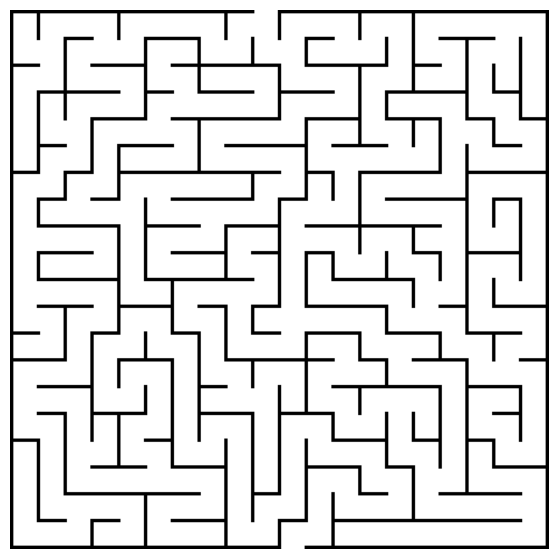

In [5]:
test_image = cv2.imread('task_1/20 by 20 orthogonal maze.png') 

plot_one_image(test_image)

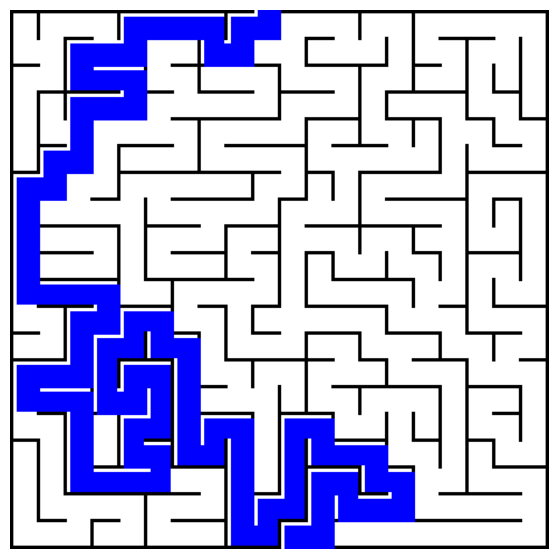

In [6]:
way_coords = find_way_from_maze(test_image)  
image_with_path = plot_maze_path(test_image, way_coords)

plot_one_image(image_with_path)


In [7]:
def find_way_from_maze_with_step(image: np.ndarray) -> tuple:
    """
    Find path through the maze  with morpholigical operation using Step.
    :param image: maze image
    :return: path coordinates from the maze as (x, y), where x and y are coordinate arrays
    """

    a = 0  # сторона квадратика обхода
    for i in range(image.shape[1]):
        if (image[0, i] == np.array([255, 255, 255])).all():
            a += 1

    img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    ret, thr = cv2.threshold(img, 50, 255, cv2.THRESH_BINARY_INV)

    contours, hierarchy = cv2.findContours(thr, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    draw = np.zeros(image.shape)
    cv2.drawContours(draw, contours, 0, (0, 0, 255), 0)

    kernel = np.ones((a, a))
    img_dilation = cv2.dilate(draw, kernel, iterations=2, borderType=cv2.BORDER_CONSTANT)
    img_erosion = cv2.erode(img_dilation, kernel, iterations=2, borderType=cv2.BORDER_CONSTANT)
    diff = cv2.absdiff(img_dilation, img_erosion)

    x = np.where(np.all(diff == np.array([0, 0, 255]), axis=-1))[0]
    y = np.where(np.all(diff == np.array([0, 0, 255]), axis=-1))[1]
    coords = (x, y)

    # Plot all steps
    plt.figure(figsize=(15, 10), facecolor="lightblue")
    
    plt.subplot(2, 3, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('1. Original Image')
    plt.axis('off')
    
    plt.subplot(2, 3, 2)
    plt.imshow(thr, cmap='gray')
    plt.title('2. Thresholded')
    plt.axis('off')
    
    plt.subplot(2, 3, 3)
    plt.imshow(draw)
    plt.title('3. Contours')
    plt.axis('off')
    
    plt.subplot(2, 3, 4)
    plt.imshow(img_dilation)
    plt.title('4. Dilated')
    plt.axis('off')
    
    plt.subplot(2, 3, 5)
    plt.imshow(img_erosion)
    plt.title('5. Eroded')
    plt.axis('off')
    
    plt.subplot(2, 3, 6)
    plt.imshow(diff)
    plt.title('6. Final Path')
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()

    return coords

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


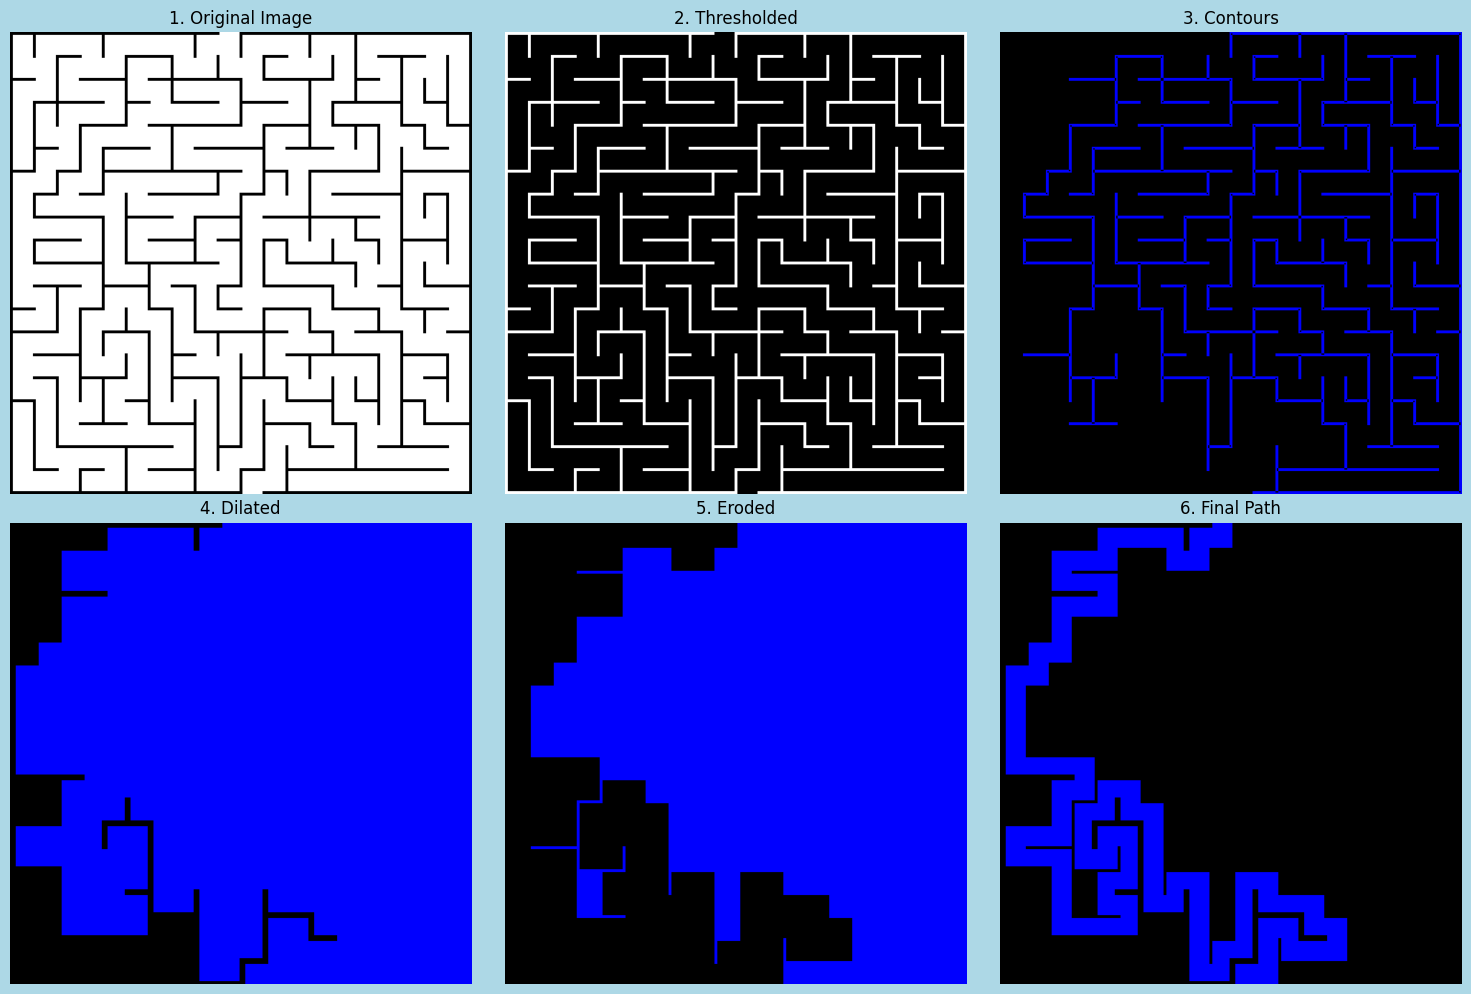

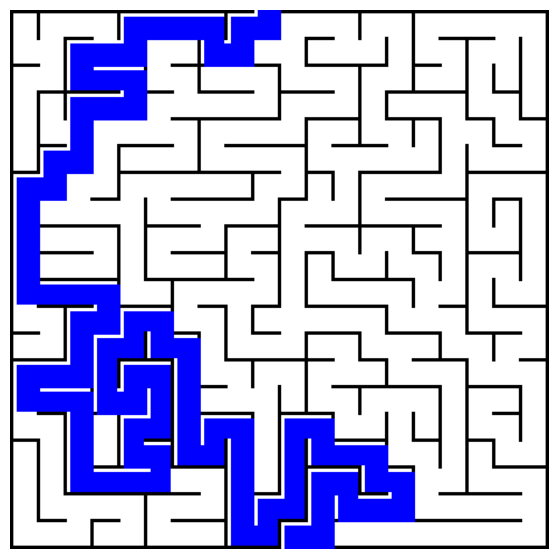

In [8]:
way_coords = find_way_from_maze_with_step(test_image)  
image_with_path = plot_maze_path(test_image, way_coords)

plot_one_image(image_with_path)